<a href="https://colab.research.google.com/github/Hebaehab765/AI4GoodLab/blob/main/Heba's_Copy_Foundations_of_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to ML
In this notebook we will explore both supervised learning and unsupervised learning using [scikit-learn](https://scikit-learn.org/stable/) library.

## Supervised Learning: Prediction of Breast Cancer
The goal for the first part of this notebook is to train a classifier to try to predict if someone has breast cancer.



### Loading the dataset
We start by loading the dataset. We will use the [Breast Cancer dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) from scikit-learn:

In [ ]:
from sklearn import datasets

data = datasets.load_breast_cancer(as_frame=True)
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

We can use the [pandas](https://pandas.pydata.org/) library to analyze the data:

In [ ]:
import pandas as pd
X, y = data.data, data.target
dataframe = pd.DataFrame(X, columns=data['feature_names'])
names = {v: k for v, k in enumerate(data.target_names)}
dataframe['target'] = y.replace(to_replace=names)
dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


We can use the [seaborn](https://seaborn.pydata.org/) library to visualize the data:

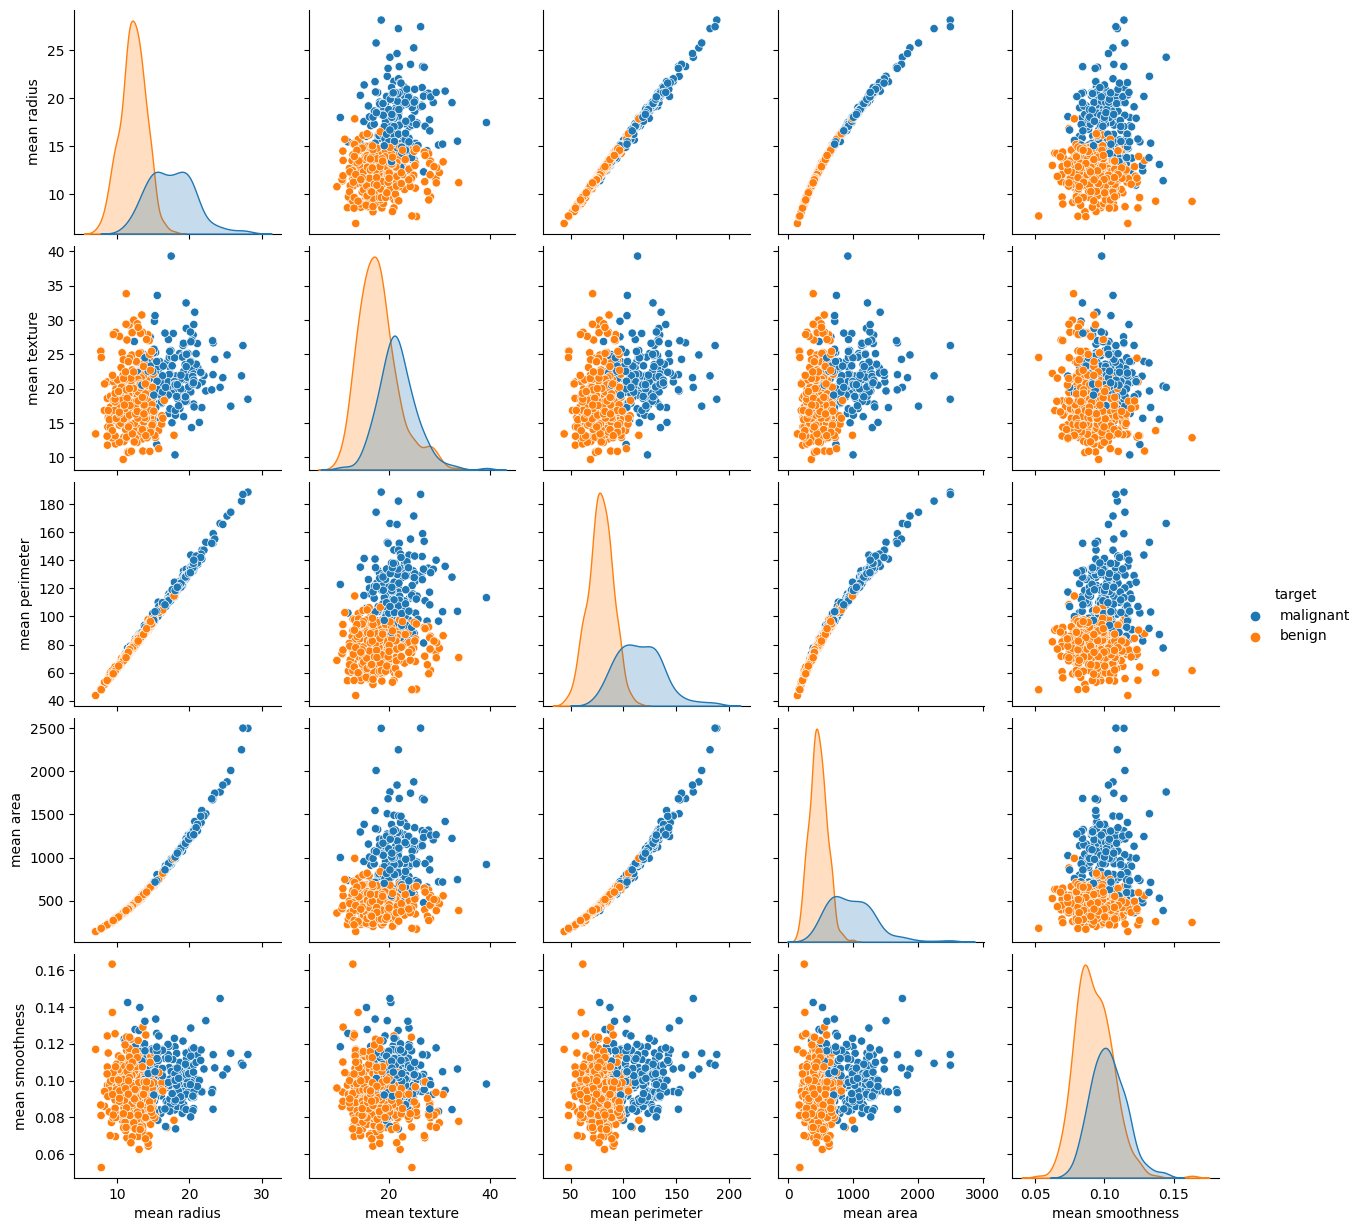

In [ ]:
import seaborn as sns
sns.pairplot(dataframe, hue='target', vars=["mean radius", "mean texture", "mean perimeter", "mean area", "mean smoothness"])

### Logistic Regression
Let's now use [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to train a classifier on this dataset.

We start by splitting the dataset into a **training set** and a **test set**.

The **training set** will be used to train the model, while the **test set** will be used to evaluate the performance of the model.

It's important to split the data into a **training set** and a **test set**, because the model can *overfit* on the **trainig set**. When the model *overfit* it is able to achieve almost perfect accuracy on the **training set** but does not necessarily generalize well to new data and thus performs poorly on the **test set**. To be able to detect overfitting we always evaluate the model on a separate split of the data that we call the **test set** that is only used for evaluation purposes and is never used for training.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We can then train the classifier on the training set using the `fit` method.

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty=None, C=1e-6, solver='lbfgs')
clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1e-06, penalty=None)

To evaluate the model we can compute the train accuracy and the test accuracy:

In [ ]:
from numpy.linalg import norm
import numpy as np

train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
coef = clf.coef_.squeeze()
weights_norm = norm(coef, 2)
num_weights_zero = len(coef) - np.count_nonzero(coef)
print(f"Train accuracy: {train_accuracy:.2%}, Test accuracy: {test_accuracy:.2%}, Weights Norm: {weights_norm:.2e}, Number of weights equal to zero: {num_weights_zero}")

Train accuracy: 95.60%, Test accuracy: 95.61%, Weights Norm: 5.33e+00, Number of weights equal to zero: 0


### Exercise:
1. We can control the amount of regularization by varying the hyperarameter C. What's the optimal value for C for the L1 penalty ? What happens when the value of C is too large ?
2. Plot the norm of the weights for different value of C for the L2 penalty ? what do you observe ?
3. Plot the number of weights equal to zero for different value of C and for both the L1 penalty and the L2 penalty. What do you observe ?

In [ ]:
# Write your solution below


##### Solution

In [ ]:
def find_best_C(list_of_C, penalty="l2", max_iter=100):
  results = dict(train_scores=[], test_scores=[], weights_norms=[], num_weights_zeros=[])
  for C in list_of_C:
    clf = LogisticRegression(penalty=penalty, C=C, max_iter=max_iter, solver='liblinear')
    clf.fit(X_train, y_train)
    results["train_scores"].append(clf.score(X_train, y_train))
    results["test_scores"].append(clf.score(X_test, y_test))
    coef = clf.coef_.squeeze()
    results["weights_norms"].append(norm(coef, 2))
    results["num_weights_zeros"].append(len(coef) - np.count_nonzero(coef))

  return results

In [ ]:
list_of_C = np.logspace(-8, 5, 100)
l1_results = find_best_C(list_of_C, "l1", max_iter=1000)
l2_results = find_best_C(list_of_C, "l2")

The best value for C for the L1 penalty is 7.30e+01 with a test accuracy of 98.25%


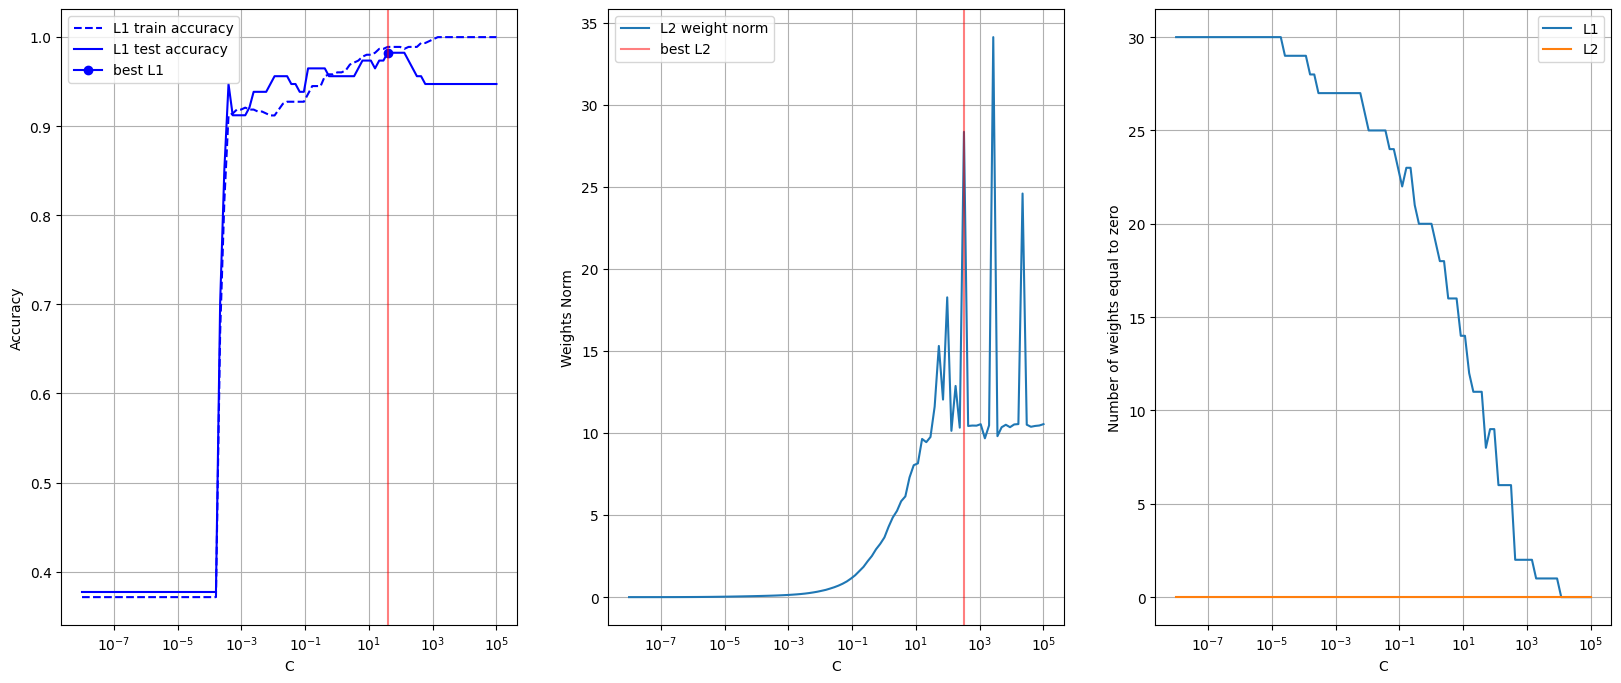

In [ ]:
import matplotlib.pyplot as plt
best_l1 = np.argmax(l1_results["test_scores"])
best_l2 = np.argmax(l2_results["test_scores"])

best_l1_score = l1_results["test_scores"][best_l1]

plt.figure(figsize=(20,8))


plt.subplot(1,3,1)
plt.plot(list_of_C, l1_results["train_scores"], label="L1 train accuracy", color="blue", linestyle='dashed',)
plt.plot(list_of_C, l1_results["test_scores"], label="L1 test accuracy", color="blue")
plt.plot(list_of_C[best_l1], best_l1_score, marker="o", color="blue", label='best L1')
plt.axvline(x=list_of_C[best_l1], color='red', alpha=0.5)
plt.xscale("log")
plt.legend()
plt.grid()
plt.xlabel('C')
plt.ylabel('Accuracy')

plt.subplot(1,3,2)
plt.plot(list_of_C, l2_results["weights_norms"], label="L2 weight norm")
plt.axvline(x=list_of_C[best_l2], color='red', alpha=0.5, label='best L2')
plt.legend()
plt.grid()
plt.xscale("log")
plt.xlabel('C')
plt.ylabel('Weights Norm')


plt.subplot(1,3,3)
plt.plot(list_of_C, l1_results["num_weights_zeros"], label="L1")
plt.plot(list_of_C, l2_results["num_weights_zeros"], label="L2")

plt.legend()
plt.grid()
plt.xscale("log")
plt.xlabel('C')
plt.ylabel('Number of weights equal to zero')


print(f"The best value for C for the L1 penalty is {best_l1:.2e} with a test accuracy of {best_l1_score:.2%}")

1. When C is too large we can observe that the training accuracy is close to 100% while the test accuracy is lower. This phenomena is calles overfitting where the model has learn to classify perfectly the examples in the training set but is unable to generalize to other examples. This often happens when the model is too powerful or when the regularization is too weak.

2. We can observe that decreasing C which corresponds to increasing the amount of L2 regularization leads to solution with a lower weights norm.

3. We can observe that the L1 norm encourages sparsity. This means that when we increase the L1 regularization, this will force the model to ignore some of the features by setting their weight to zero. Thus the model only focus on the most important features.

## Unsupervised Learning: PCA and K-mean
When dealing with high dimensional data it can sometimes be difficult to visualize such data. Some techniques can be use to project the data into a 2D space, a common technique to do this is [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

Furthermore sometimes we want to classify some data but we might not have the associated target. We thus can't used standard supervised learning technique such as logistic regression. However we might still be to *cluster* the data into distinct groups based only on the features. One such technique clustering method is called [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

We will epplore both PCA and K-means in this tutorial.

### Visualizing high-dimensional data in 2D using PCA

Let's get back to our previous example of the prediction of Breast Cancer.
The dataset is composed of 30 attributes making it hard to visualize, let's project it on a 2D space using PCA.

In [ ]:
from sklearn import datasets
from sklearn.decomposition import PCA

data_cancer = datasets.load_breast_cancer(as_frame=True)
X_cancer, y_cancer = data_cancer.data, data_cancer.target

pca = PCA(n_components=2)
pca.fit(X_cancer)
projected_X_cancer = pca.transform(X_cancer)

Let's now visualize the projection of the dataset on the 2D plane:

<ipython-input-15-29754b7d9c9c>:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(point[0], point[1], c=color[target], alpha=0.3)


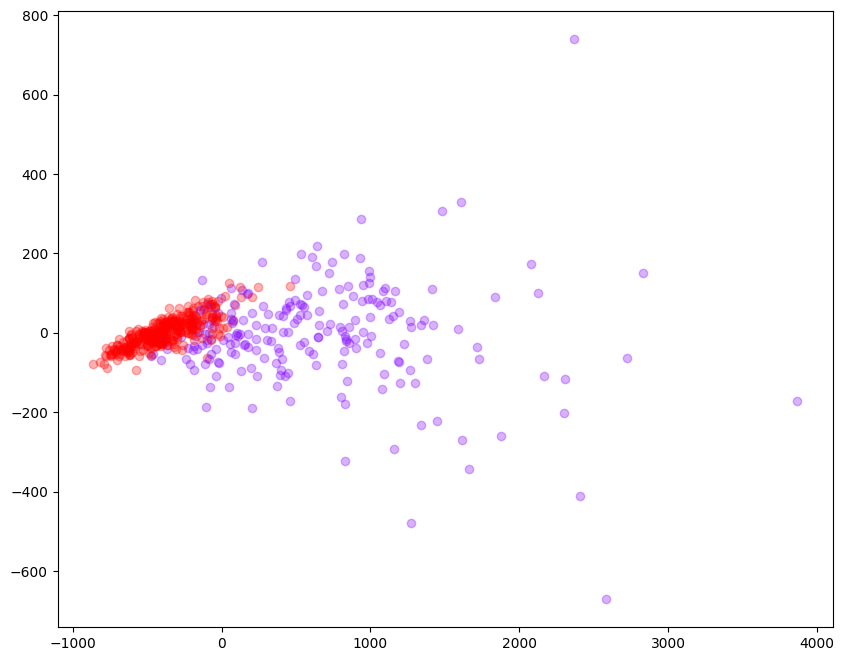

In [ ]:
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt

color=cm.rainbow(np.linspace(0,1,2))
plt.figure(figsize=(10,8))
for point, target in zip(projected_X_cancer, y_cancer):
  plt.scatter(point[0], point[1], c=color[target], alpha=0.3)

#### Further Information:

PCA can be used to visualize the genes of some specific population. For example, some researchers showed that ["Genes mirror geography within Europe"](https://www.nature.com/articles/nature07331) using PCA analysis.

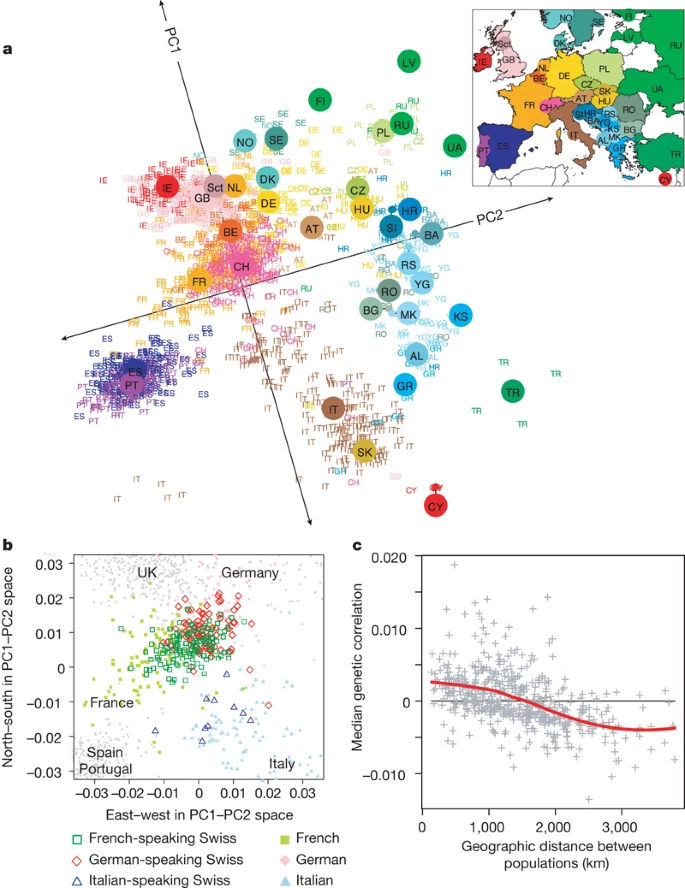

### Unsupervised clustering using K-means
We can use the K-means clusstering to cluster points that are close together.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
kmeans.fit(X_cancer)
prediction_cancer = kmeans.predict(X_cancer)

<ipython-input-17-a7b0db342543>:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(point[0], point[1], c=color[target], alpha=0.3)


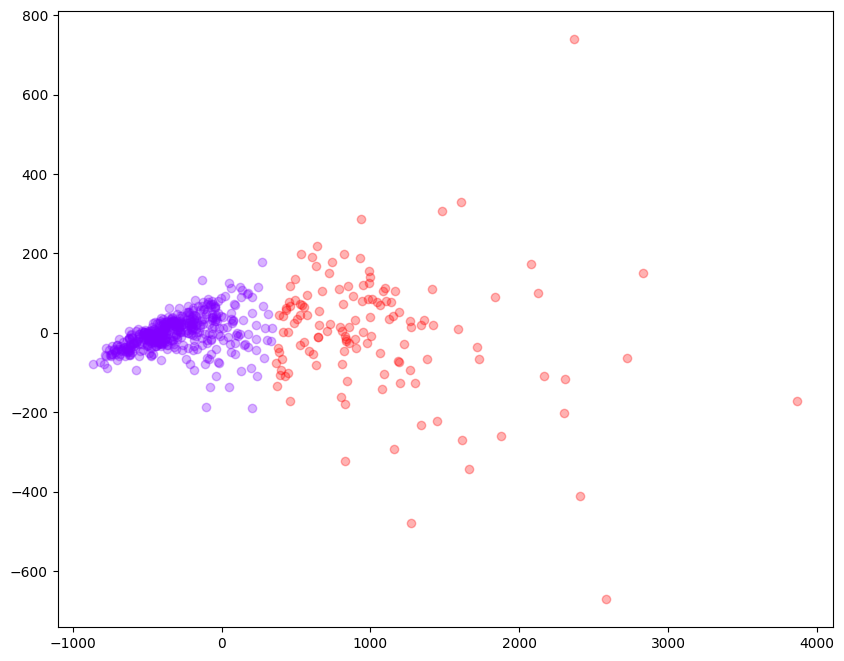

In [ ]:
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt

color=cm.rainbow(np.linspace(0,1,2))
plt.figure(figsize=(10,8))
for point, target in zip(projected_X_cancer, prediction_cancer):
  plt.scatter(point[0], point[1], c=color[target], alpha=0.3)

### Exercise:
1. Load the iris dataset from scikit-learn [see documentation](https://scikit-learn.org/stable/datasets/toy_dataset.html).
2. Use PCA to project the dataset into a 2D space.
3. Visualize the 2D projection of the dataset and color each points with a color associated with its label.
4. Cluster the points using K-means
5. Visualize the 2D projection of the dataset but this time color each points with the color of its cluster.
6. Do k-mean labels correspond to the true labels? Why does it happens?

In [ ]:
# Write your solution below


##### Solution

In [ ]:
from sklearn import datasets
from sklearn.decomposition import PCA

data_iris = datasets.load_iris(as_frame=True)
X_iris, y_iris = data_iris.data, data_iris.target

pca = PCA(n_components=2)
pca.fit(X_iris)
projected_X_iris = pca.transform(X_iris)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto")
kmeans.fit(X_iris)
prediction_iris = kmeans.predict(X_iris)

<ipython-input-20-d2da8421de1e>:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(point[0], point[1], c=color[target])
<ipython-input-20-d2da8421de1e>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(point[0], point[1], c=color[target])


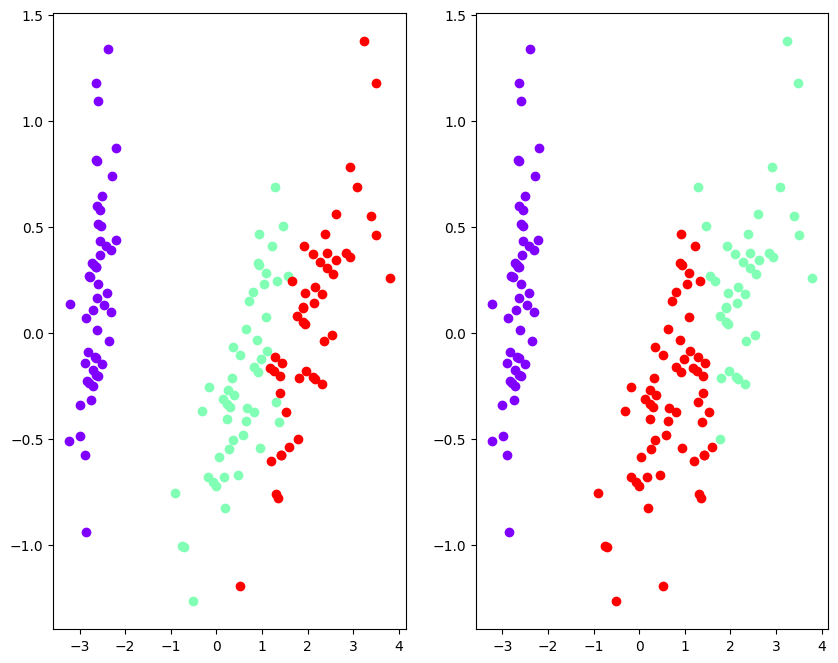

In [ ]:
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt

color=cm.rainbow(np.linspace(0,1,3))
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
for point, target in zip(projected_X_iris, y_iris):
  plt.scatter(point[0], point[1], c=color[target])

plt.subplot(1, 2, 2)
for point, target in zip(projected_X_iris, prediction_iris):
  plt.scatter(point[0], point[1], c=color[target])